## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN","NAME"],axis=1)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
#just checking for nulls real quick like
null_counts = application_df.isnull().sum()
null_counts

APPLICATION_TYPE          0
AFFILIATION               0
CLASSIFICATION            0
USE_CASE                  0
ORGANIZATION              0
STATUS                    0
INCOME_AMT                0
SPECIAL_CONSIDERATIONS    0
ASK_AMT                   0
IS_SUCCESSFUL             0
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
df_apps = application_df['APPLICATION_TYPE'].value_counts()
df_apps

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(df_apps[df_apps<500].index)

# Replace in dataframe
for app in application_types_to_replace:
     application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# # Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
df_class = application_df['CLASSIFICATION'].value_counts()
df_class

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2500        1
C1900        1
C1820        1
C1245        1
C6100        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [8]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#code for this found here: https://re-thought.com/pandas-value_counts/ (noting for reference)
application_df['CLASSIFICATION'].value_counts().loc[lambda x : x>1]


C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C2300       32
C7200       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1278       10
C1238       10
C1235        9
C1237        9
C7210        7
C1720        6
C2400        6
C4100        6
C1600        5
C1257        5
C1260        3
C0           3
C2710        3
C1267        2
C3200        2
C1256        2
C1234        2
C1246        2
Name: CLASSIFICATION, dtype: int64

In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(df_class[df_class<500].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts().sort_index(ascending=True)

C1000    17326
C1200     4837
C2000     6074
C2100     1883
C3000     1918
C7000      777
Other     1484
Name: CLASSIFICATION, dtype: int64

In [10]:
# Convert categorical data to numeric with `pd.get_dummies`
df2 = pd.get_dummies(application_df)
df2

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
# Split our preprocessed data into our features and target arrays
#features = everything but the IS SUCCESSFUL (originally dum dummed it up and tried ASK_AMT but that's a diff model)
X = df2.drop(columns=["IS_SUCCESSFUL"]).values
#target = just the ASK AMOUNT
y = df2[["IS_SUCCESSFUL"]].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
X_train.shape

(25724, 44)

In [13]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [14]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
start = 44
h1 = 80
h2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(input_dim=start, units=h1, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=h2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3600      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 6,061
Trainable params: 6,061
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [16]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)


Epoch 1/100
804/804 [==============================] - 1s 902us/step - loss: 48119.1172 - accuracy: 0.4904
Epoch 2/100
804/804 [==============================] - 1s 833us/step - loss: 67159.8125 - accuracy: 0.4920
Epoch 3/100
804/804 [==============================] - 1s 840us/step - loss: 14740.1035 - accuracy: 0.4939
Epoch 4/100
804/804 [==============================] - 1s 871us/step - loss: 42573.4297 - accuracy: 0.5102
Epoch 5/100
804/804 [==============================] - 1s 859us/step - loss: 24019.7324 - accuracy: 0.5033
Epoch 6/100
804/804 [==============================] - 1s 849us/step - loss: 16212.4395 - accuracy: 0.5334
Epoch 7/100
804/804 [==============================] - 1s 841us/step - loss: 4718.2646 - accuracy: 0.5057
Epoch 8/100
804/804 [==============================] - 1s 865us/step - loss: 28141.7539 - accuracy: 0.5091
Epoch 9/100
804/804 [==============================] - 1s 842us/step - loss: 4464.4590 - accuracy: 0.5069
Epoch 10/100
804/804 [=================

804/804 [==============================] - 1s 829us/step - loss: 0.6912 - accuracy: 0.5318
Epoch 80/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5318
Epoch 81/100
804/804 [==============================] - 1s 991us/step - loss: 0.6912 - accuracy: 0.5318
Epoch 82/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5318
Epoch 83/100
804/804 [==============================] - 1s 987us/step - loss: 0.6912 - accuracy: 0.5318
Epoch 84/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5318
Epoch 85/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5318
Epoch 86/100
804/804 [==============================] - 1s 991us/step - loss: 0.6912 - accuracy: 0.53180s - l
Epoch 87/100
804/804 [==============================] - 1s 978us/step - loss: 0.6912 - accuracy: 0.5318
Epoch 88/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.7186 - accuracy: 0.7132
Loss: 0.7186084985733032, Accuracy: 0.7132361531257629


<AxesSubplot:title={'center':'Accuracy for Attempt #1'}>

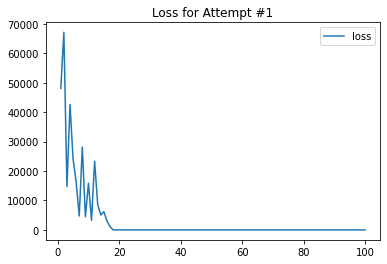

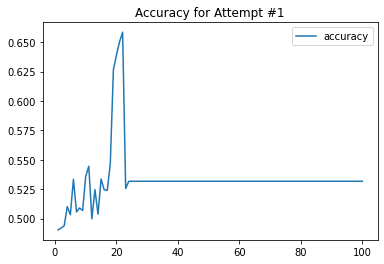

In [34]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss",title="Loss for Attempt #1")
history_df.plot(y="accuracy", title="Accuracy for Attempt #1") 

## Attempt 2
Change Made: Dropping the ask amount as it has somewhat of a proxy in the Ranges that are pre-binned


In [18]:
new_df = df2.drop(columns=["ASK_AMT"],index=1)
new_df

,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [19]:
# Split our preprocessed data into our features and target arrays
#features = everything but the IS SUCCESSFUL (originally dum dummed it up and tried ASK_AMT but that's a diff model)
X = new_df.drop(columns=["IS_SUCCESSFUL"]).values
#target = just the ASK AMOUNT
y = new_df[["IS_SUCCESSFUL"]].values

# Split the preprocessed data into a training and testing dataset
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y)

In [27]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train_new)

# Scale the data
X_train_scaled_new = X_scaler.transform(X_train_new)
X_test_scaled_new = X_scaler.transform(X_test_new)

In [21]:
X_train_new.shape

(25723, 43)

In [22]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
start2 = 43
h1 = 80
h2 = 30

nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(tf.keras.layers.Dense(input_dim=start2, units=h1, activation="relu"))

# Second hidden layer
nn2.add(tf.keras.layers.Dense(units=h2, activation="relu"))

# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 80)                3520      
_________________________________________________________________
dense_4 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [23]:
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
fit_new_model = nn2.fit(X_train_new,y_train_new,epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 642us/step - loss: 0.5717 - accuracy: 0.7189
Epoch 2/100
804/804 [==============================] - 1s 641us/step - loss: 0.5527 - accuracy: 0.7295
Epoch 3/100
804/804 [==============================] - 1s 631us/step - loss: 0.5494 - accuracy: 0.7317
Epoch 4/100
804/804 [==============================] - 1s 651us/step - loss: 0.5472 - accuracy: 0.7304
Epoch 5/100
804/804 [==============================] - 1s 654us/step - loss: 0.5464 - accuracy: 0.7321
Epoch 6/100
804/804 [==============================] - 1s 848us/step - loss: 0.5457 - accuracy: 0.7332
Epoch 7/100
804/804 [==============================] - 1s 673us/step - loss: 0.5451 - accuracy: 0.7330
Epoch 8/100
804/804 [==============================] - 1s 641us/step - loss: 0.5442 - accuracy: 0.7336
Epoch 9/100
804/804 [==============================] - 1s 652us/step - loss: 0.5430 - accuracy: 0.7353
Epoch 10/100
804/804 [==============================] - 1s 645us/step - l

804/804 [==============================] - 1s 1ms/step - loss: 0.5319 - accuracy: 0.7418
Epoch 81/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5319 - accuracy: 0.7403
Epoch 82/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5322 - accuracy: 0.7410
Epoch 83/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5319 - accuracy: 0.7414
Epoch 84/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5321 - accuracy: 0.7414
Epoch 85/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5318 - accuracy: 0.7415
Epoch 86/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5315 - accuracy: 0.7421
Epoch 87/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5318 - accuracy: 0.7418
Epoch 88/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5317 - accuracy: 0.7408
Epoch 89/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5319 - accuracy: 

<AxesSubplot:title={'center':'Accuracy for Attempt #2'}>

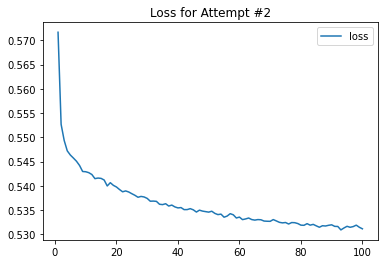

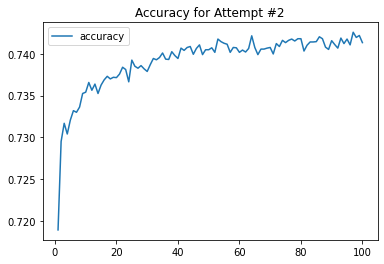

In [35]:
# Create a DataFrame containing training history
history_df2 = pd.DataFrame(fit_new_model.history)

# Increase the index by 1 to match the number of epochs
history_df2.index += 1

# Plot the loss
history_df2.plot(y="loss",title="Loss for Attempt #2")
history_df2.plot(y="accuracy", title="Accuracy for Attempt #2") 

## Attempt 3
Change Made: Doubling the epochs, it seemed to be getting close to the 75% accuracy and by the graph above it wasn't completely stalling out yet.

In [36]:
fit_new_new_model = nn2.fit(X_train_new,y_train_new,epochs=200)

Epoch 1/200
804/804 [==============================] - 0s 602us/step - loss: 0.5312 - accuracy: 0.7415
Epoch 2/200
804/804 [==============================] - 0s 600us/step - loss: 0.5312 - accuracy: 0.7414
Epoch 3/200
804/804 [==============================] - 0s 612us/step - loss: 0.5313 - accuracy: 0.7411
Epoch 4/200
804/804 [==============================] - 0s 619us/step - loss: 0.5315 - accuracy: 0.7414
Epoch 5/200
804/804 [==============================] - 0s 618us/step - loss: 0.5311 - accuracy: 0.7406
Epoch 6/200
804/804 [==============================] - 0s 594us/step - loss: 0.5314 - accuracy: 0.7415
Epoch 7/200
804/804 [==============================] - 0s 618us/step - loss: 0.5311 - accuracy: 0.7420
Epoch 8/200
804/804 [==============================] - 1s 647us/step - loss: 0.5311 - accuracy: 0.7422
Epoch 9/200
804/804 [==============================] - 1s 621us/step - loss: 0.5310 - accuracy: 0.7412
Epoch 10/200
804/804 [==============================] - 0s 597us/step - l

804/804 [==============================] - 1s 888us/step - loss: 0.5295 - accuracy: 0.7425
Epoch 80/200
804/804 [==============================] - 1s 858us/step - loss: 0.5294 - accuracy: 0.7425
Epoch 81/200
804/804 [==============================] - 1s 859us/step - loss: 0.5294 - accuracy: 0.7423
Epoch 82/200
804/804 [==============================] - 1s 871us/step - loss: 0.5297 - accuracy: 0.7421
Epoch 83/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5296 - accuracy: 0.7425
Epoch 84/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5293 - accuracy: 0.7422
Epoch 85/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5295 - accuracy: 0.7423
Epoch 86/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5294 - accuracy: 0.7423
Epoch 87/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5295 - accuracy: 0.7415
Epoch 88/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5295 - ac

804/804 [==============================] - 1s 1ms/step - loss: 0.5289 - accuracy: 0.7421
Epoch 159/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5286 - accuracy: 0.7426
Epoch 160/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5286 - accuracy: 0.7426
Epoch 161/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5287 - accuracy: 0.7425
Epoch 162/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5286 - accuracy: 0.7421
Epoch 163/200
804/804 [==============================] - 1s 766us/step - loss: 0.5291 - accuracy: 0.7416
Epoch 164/200
804/804 [==============================] - 1s 639us/step - loss: 0.5289 - accuracy: 0.7426
Epoch 165/200
804/804 [==============================] - 1s 737us/step - loss: 0.5285 - accuracy: 0.7427
Epoch 166/200
804/804 [==============================] - 1s 718us/step - loss: 0.5284 - accuracy: 0.7425
Epoch 167/200
804/804 [==============================] - 1s 718us/step - loss: 

<AxesSubplot:title={'center':'Accuracy for Attempt #2'}>

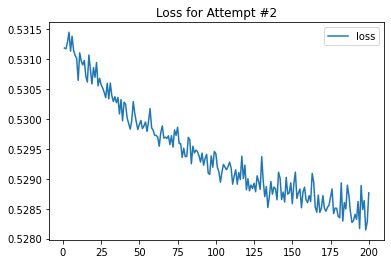

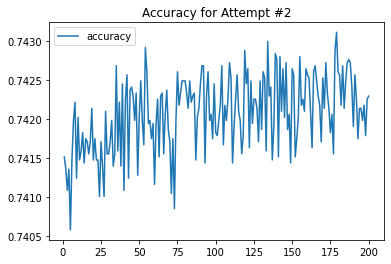

In [37]:
# Create a DataFrame containing training history
history_df3 = pd.DataFrame(fit_new_new_model.history)

# Increase the index by 1 to match the number of epochs
history_df3.index += 1

# Plot the loss
history_df3.plot(y="loss",title="Loss for Attempt #2")
history_df3.plot(y="accuracy", title="Accuracy for Attempt #2")

### Turns out this was a wrong assumption

In [38]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")

## Attempt 4
Change: Going to play with the layers and neurons a bit

In [39]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
start3 = 43
h1 = 50
h2 = 30
h3 = 20

nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(tf.keras.layers.Dense(input_dim=start2, units=h1, activation="relu"))

# Second hidden layer
nn3.add(tf.keras.layers.Dense(units=h2, activation="relu"))

# Second hidden layer
nn3.add(tf.keras.layers.Dense(units=h3, activation="relu"))

# Output layer
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 50)                2200      
_________________________________________________________________
dense_7 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_8 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 21        
Total params: 4,371
Trainable params: 4,371
Non-trainable params: 0
_________________________________________________________________


In [40]:
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [41]:
fit_new_new_new_model = nn3.fit(X_train_new,y_train_new,epochs=150)

Epoch 1/150
804/804 [==============================] - 1s 652us/step - loss: 0.5726 - accuracy: 0.7181
Epoch 2/150
804/804 [==============================] - 1s 655us/step - loss: 0.5532 - accuracy: 0.7297
Epoch 3/150
804/804 [==============================] - 1s 659us/step - loss: 0.5505 - accuracy: 0.7311
Epoch 4/150
804/804 [==============================] - 1s 673us/step - loss: 0.5486 - accuracy: 0.7323
Epoch 5/150
804/804 [==============================] - 1s 645us/step - loss: 0.5470 - accuracy: 0.7332
Epoch 6/150
804/804 [==============================] - 1s 640us/step - loss: 0.5454 - accuracy: 0.7332
Epoch 7/150
804/804 [==============================] - 1s 680us/step - loss: 0.5450 - accuracy: 0.7330
Epoch 8/150
804/804 [==============================] - 1s 648us/step - loss: 0.5437 - accuracy: 0.7334
Epoch 9/150
804/804 [==============================] - 1s 657us/step - loss: 0.5434 - accuracy: 0.7343
Epoch 10/150
804/804 [==============================] - 1s 714us/step - l

804/804 [==============================] - 1s 982us/step - loss: 0.5326 - accuracy: 0.7414
Epoch 81/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5328 - accuracy: 0.7418
Epoch 82/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5325 - accuracy: 0.7417
Epoch 83/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5329 - accuracy: 0.7412
Epoch 84/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5327 - accuracy: 0.7412
Epoch 85/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5322 - accuracy: 0.7416
Epoch 86/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5321 - accuracy: 0.7416
Epoch 87/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5322 - accuracy: 0.7417
Epoch 88/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5322 - accuracy: 0.7405
Epoch 89/150
804/804 [==============================] - 1s 957us/step - loss: 0.5322 - accura

<AxesSubplot:title={'center':'Accuracy for Attempt #3'}>

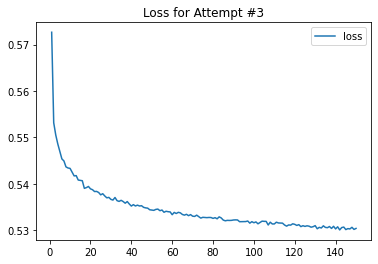

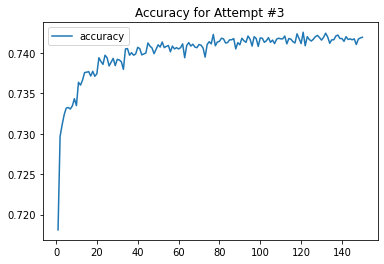

In [42]:
# Create a DataFrame containing training history
history_df4 = pd.DataFrame(fit_new_new_new_model.history)

# Increase the index by 1 to match the number of epochs
history_df4.index += 1

# Plot the loss
history_df4.plot(y="loss",title="Loss for Attempt #3")
history_df4.plot(y="accuracy", title="Accuracy for Attempt #3")